In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
import keras
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import statistics

Using TensorFlow backend.


In [2]:
df = pd.read_excel(r'C:\Users\u22v09\Desktop\Data_7_14.xlsx')
df = df.rename(columns = {'Unnamed: 0':'time'}).set_index('time')
df.index.freq = 'H'

In [3]:
df[df['EM4'] < 0] = 0

In [4]:
df.shape

(721, 1)

In [5]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

raw_seq = list(df['EM4'].values)
n_steps = 50
X, y = split_sequence(raw_seq, n_steps = n_steps)
t =[]
x =[]
for i in range(len(X)):
    t.append(X[i])
    x.append(y[i])
inp = pd.DataFrame(t)
out = pd.DataFrame(x)
out = out.rename(columns= {0:'out'})
df = inp.merge(out, left_index = True, right_index = True)

# Exclusive Window

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



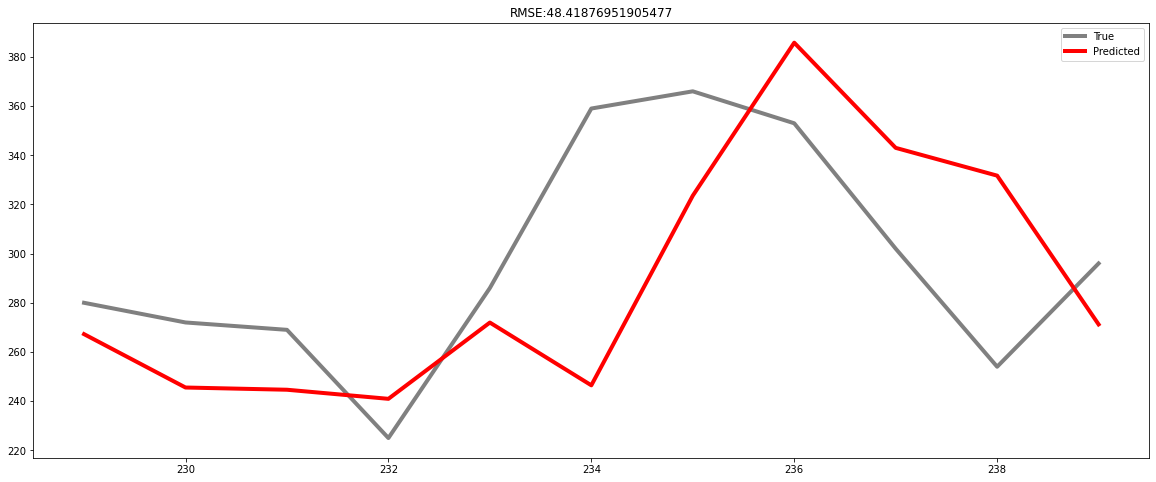

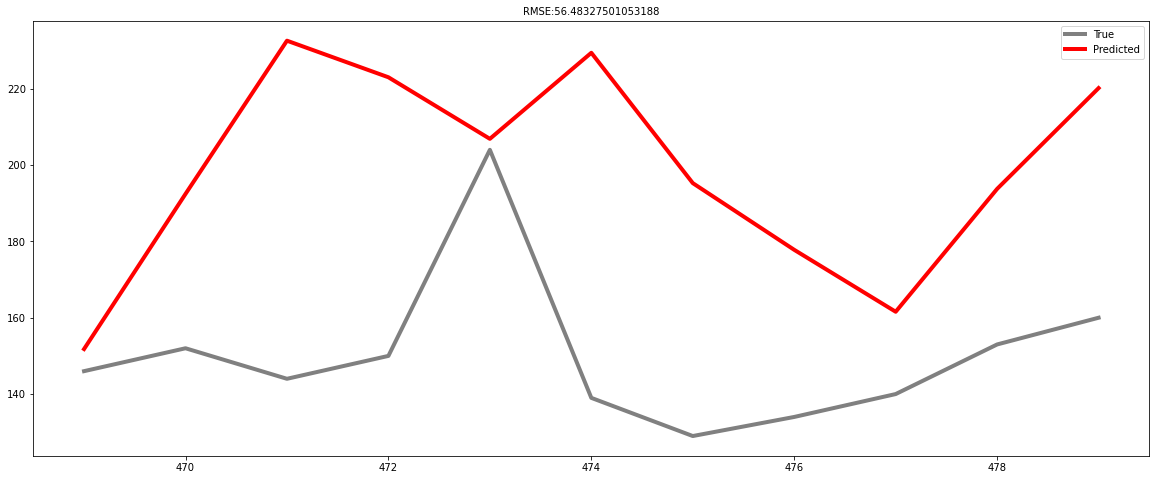

In [6]:
RMSE = []    
m = 0
n = 24*10
for i in range(n,len(df),n):
    EM4_new = df.iloc[m:i]
    m = i
    train = EM4_new[:-10]
    test = EM4_new[-11:]
    
    import warnings
    warnings.filterwarnings('ignore')
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=n_steps))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit((train.drop('out', axis = 1)).values, train['out'], epochs=200, verbose=0)
    
    x_input = array(test.drop('out', axis = 1).values)
    yhat = model.predict(x_input, verbose=0)
    pred = pd.DataFrame(yhat, index = test.index)
    pred = pred.rename(columns= {0:'Pred'})
    pred['True'] = test['out'].values
    
    rmse = sqrt(mean_squared_error(pred['Pred'],pred['True']))
    RMSE.append(rmse)
    plt.figure(figsize=(20,8))
    plt.title('RMSE:{}'.format(rmse))
    plt.rcParams['axes.titlesize'] = 10
    plt.plot(pred['True'], label='True', lw = 4, color = 'grey')
    plt.plot(pred['Pred'], label='Predicted', lw = 4, color = 'red')
    plt.legend(loc='best')
    plt.show()

In [7]:
statistics.mean(RMSE)

52.45102226479332

# Inclusive Window

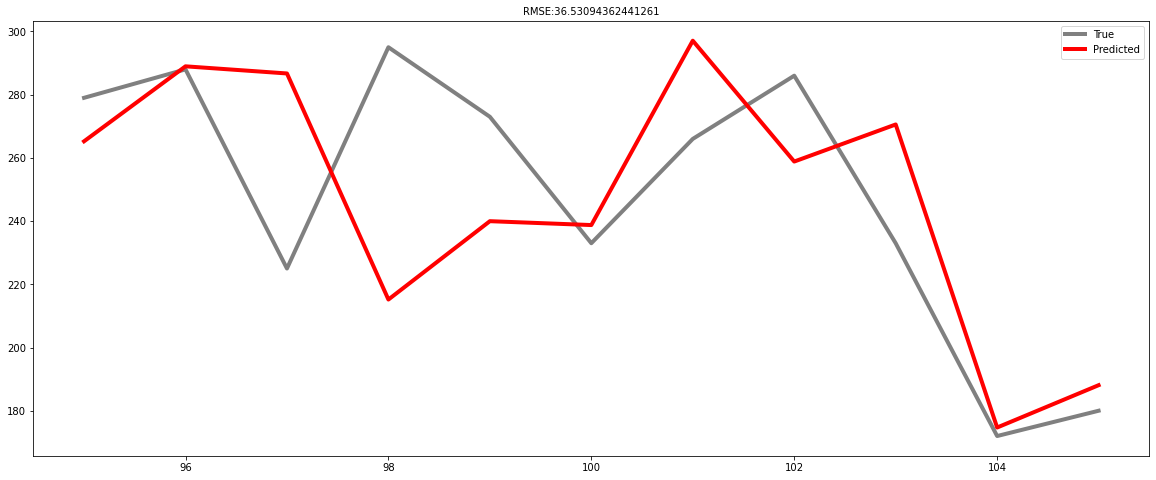

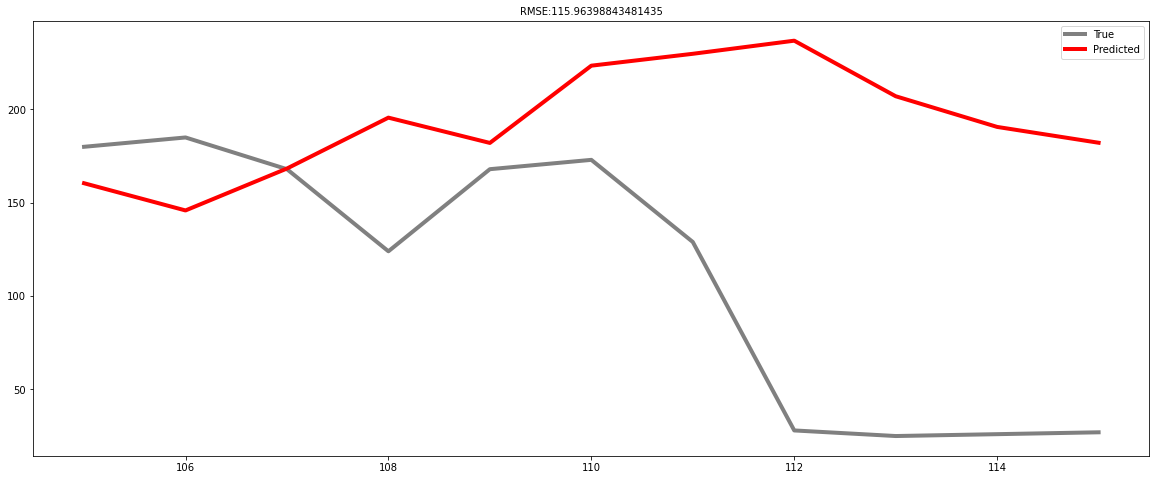

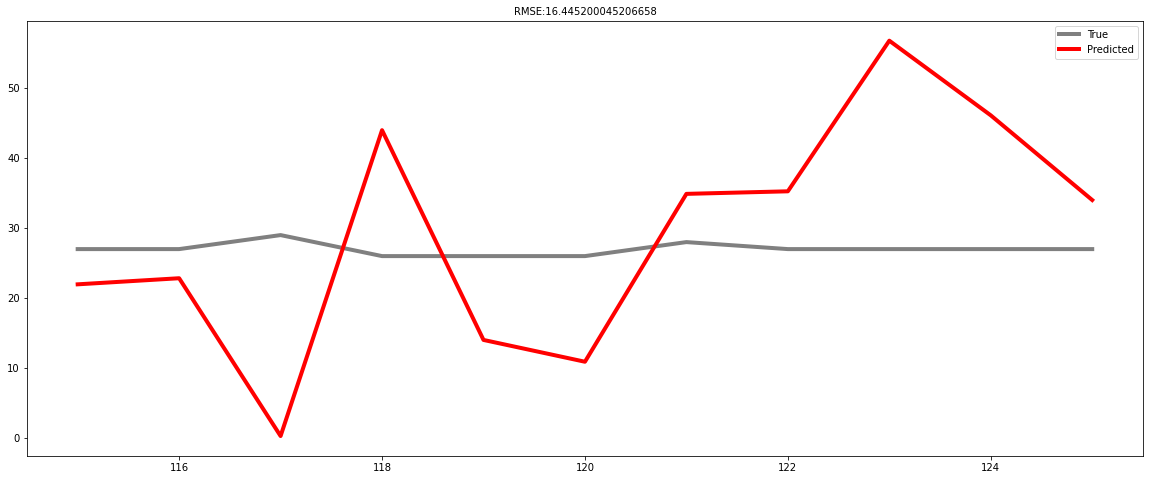

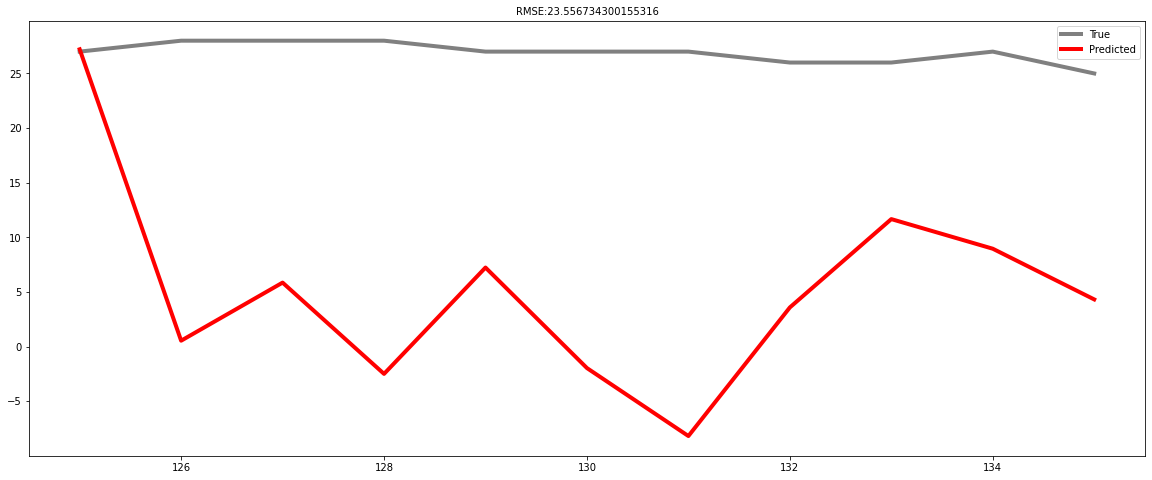

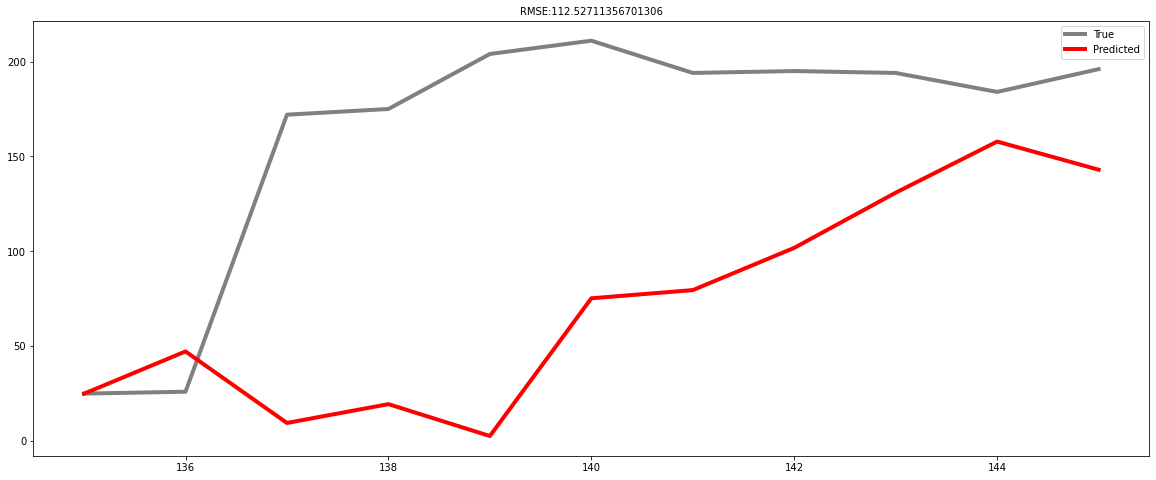

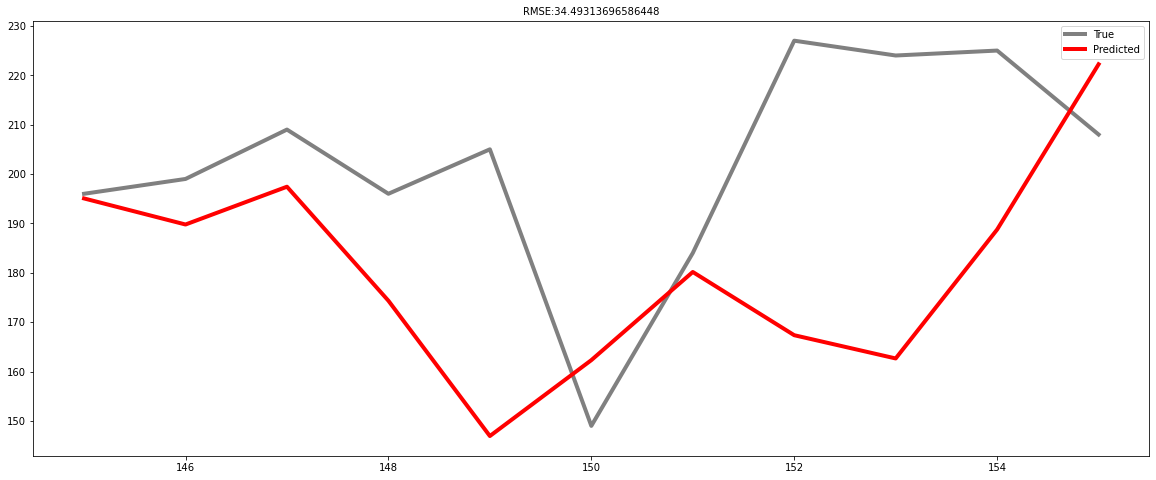

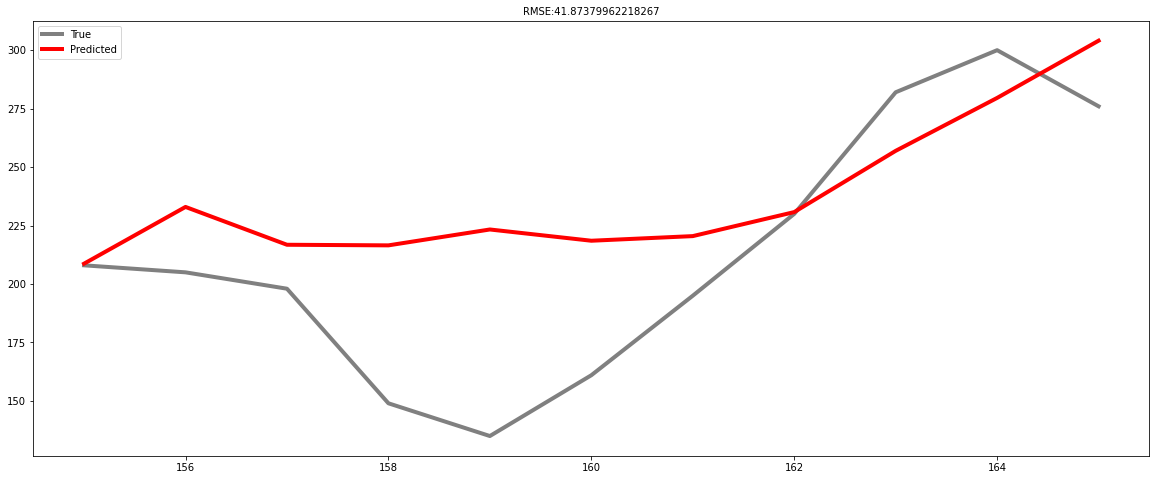

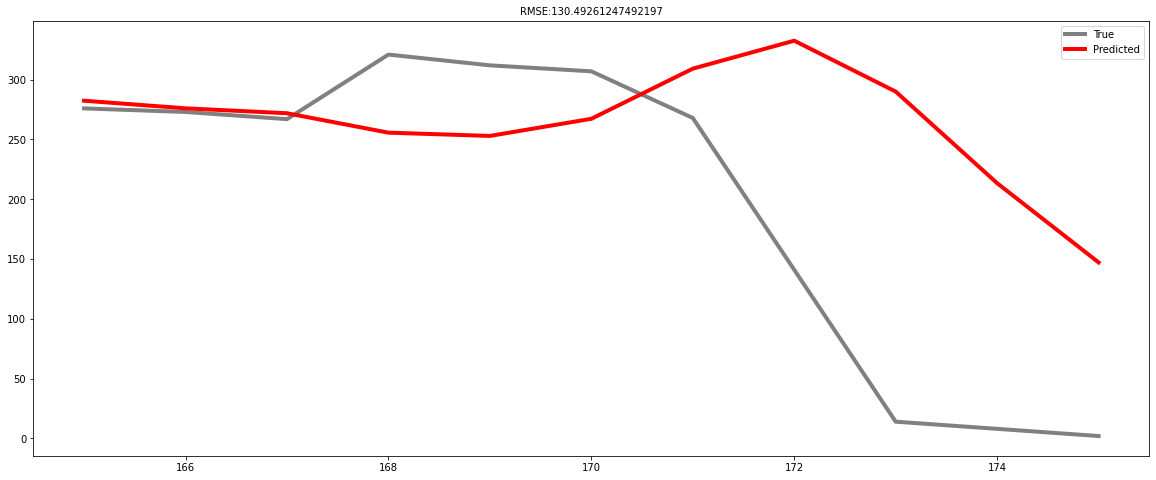

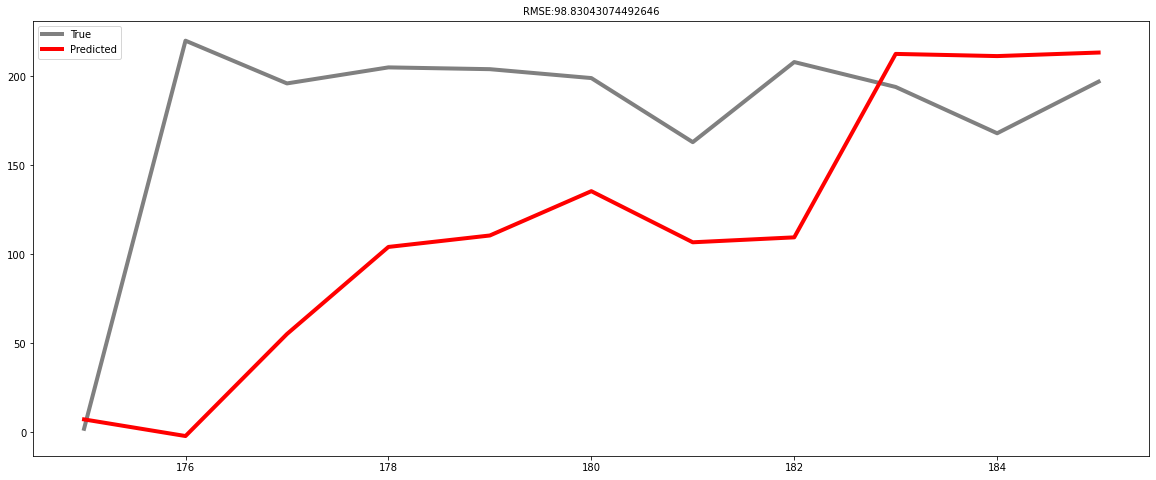

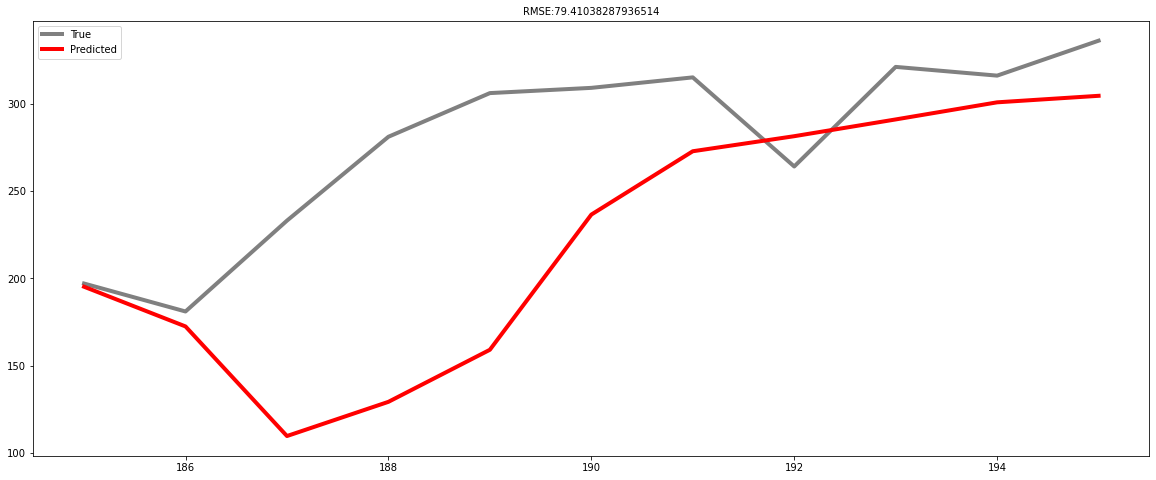

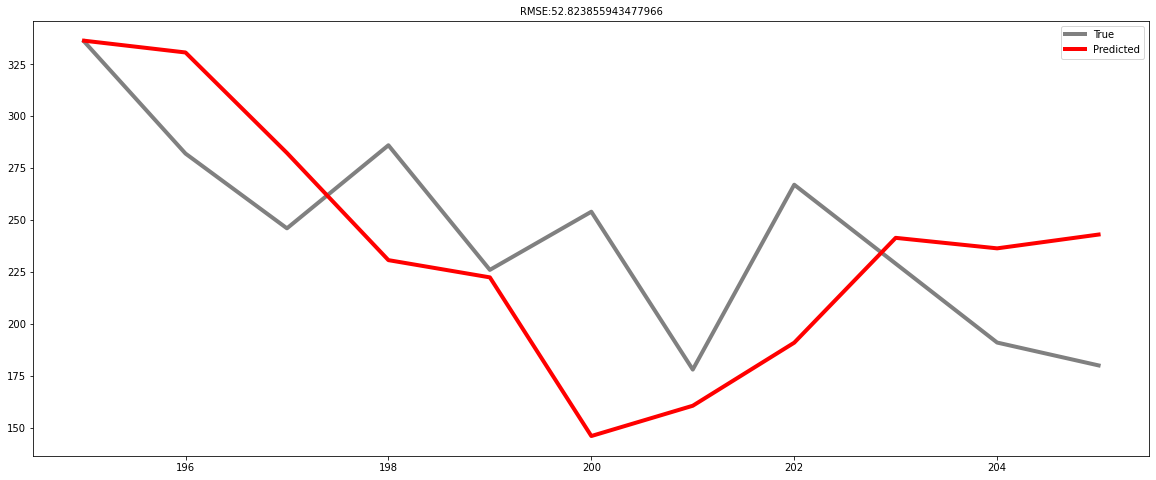

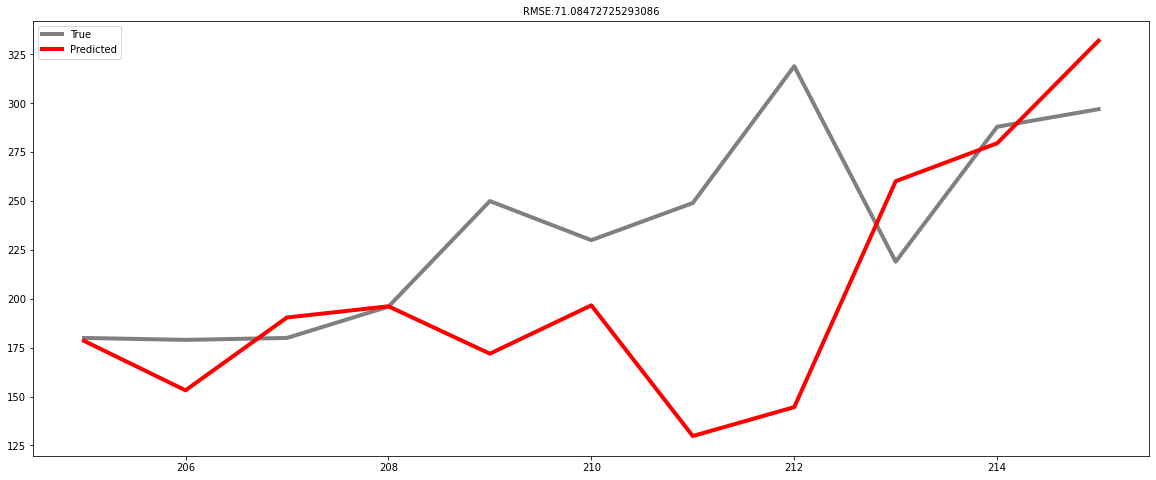

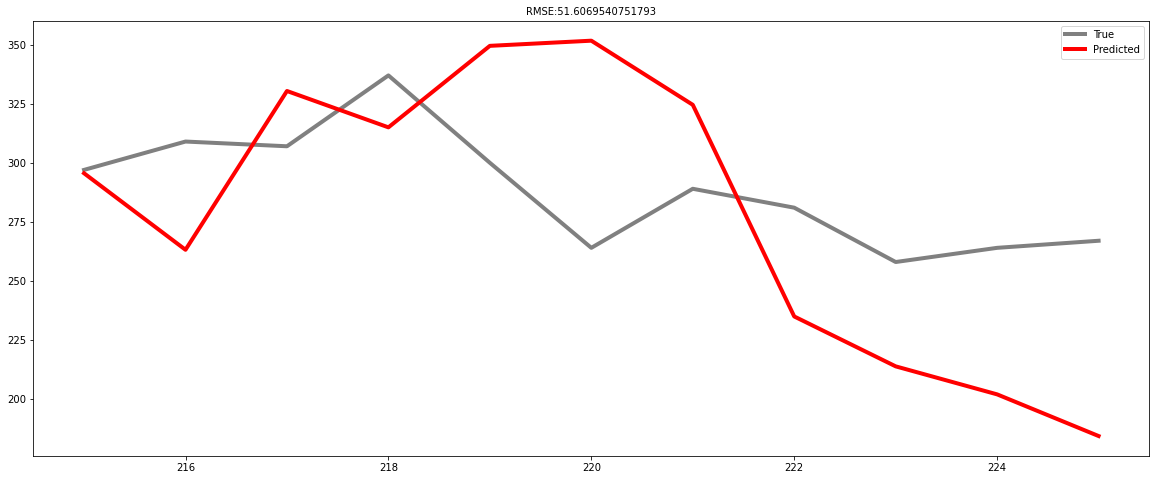

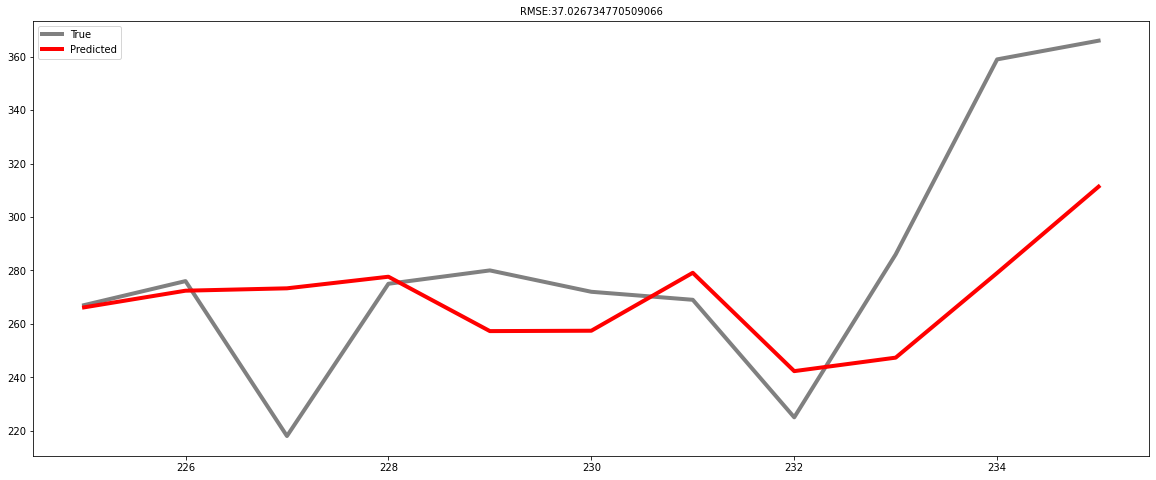

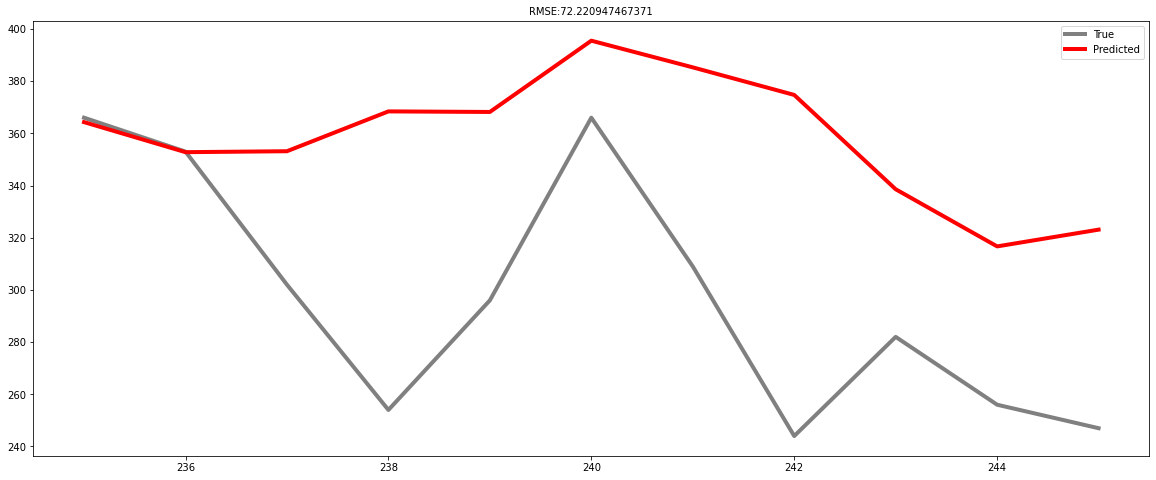

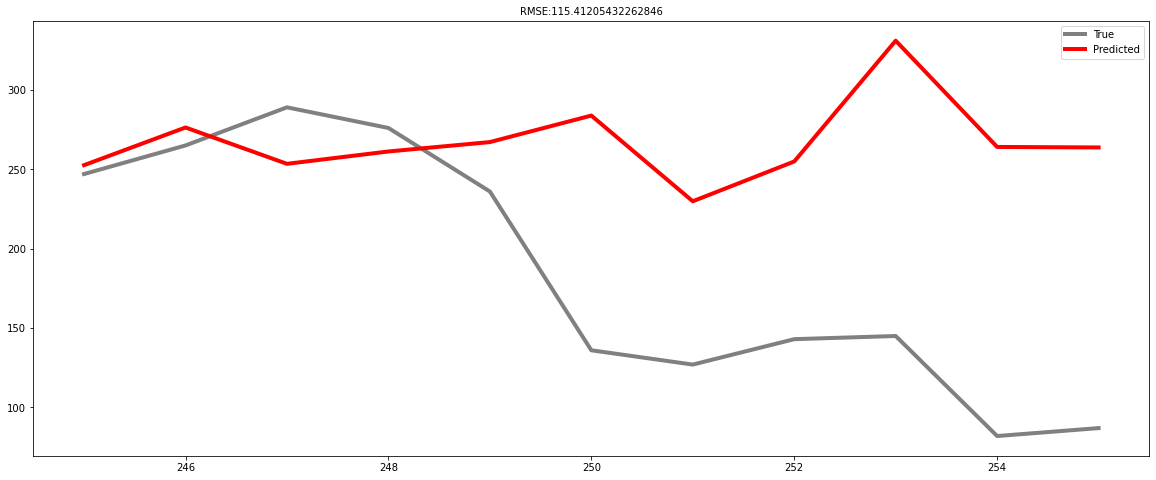

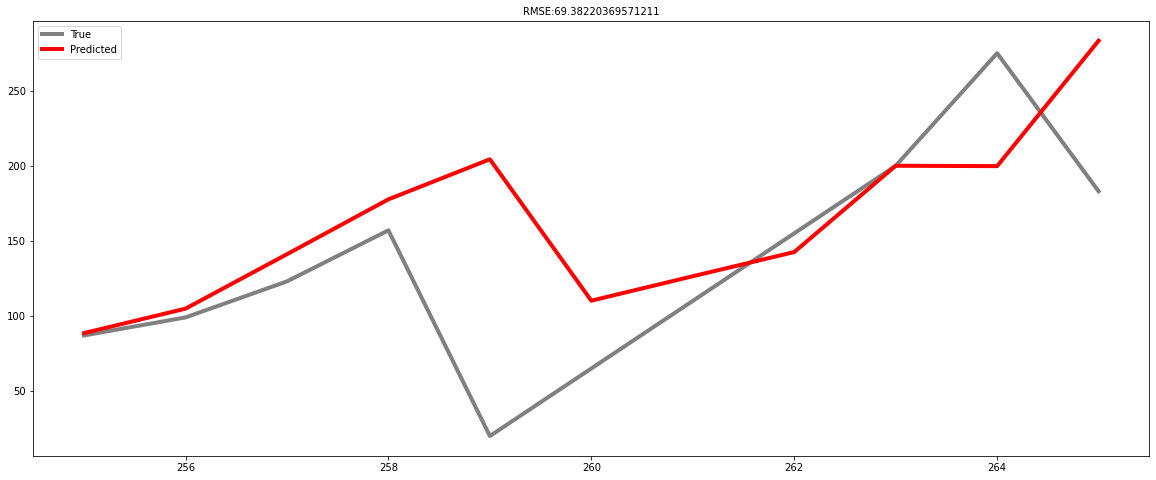

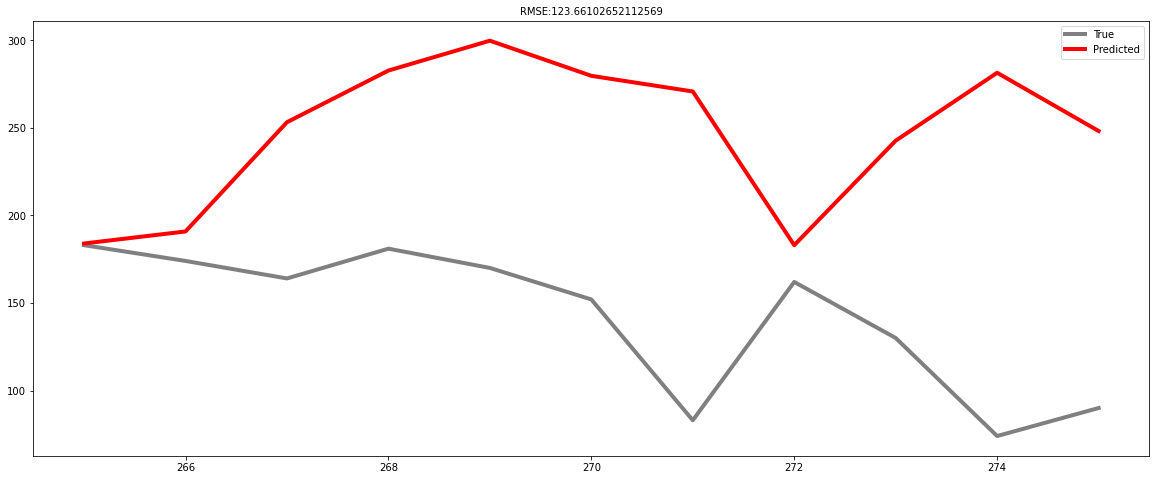

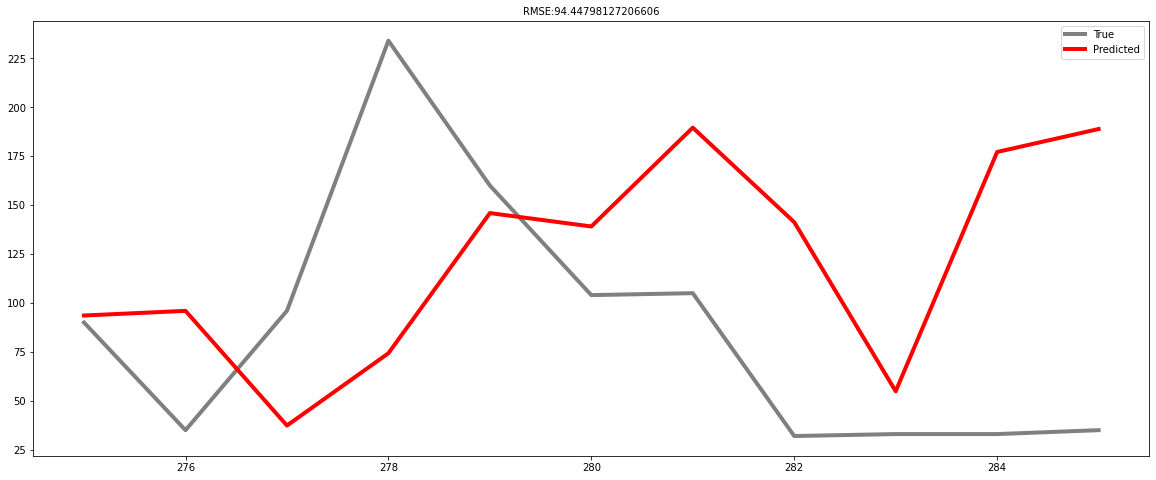

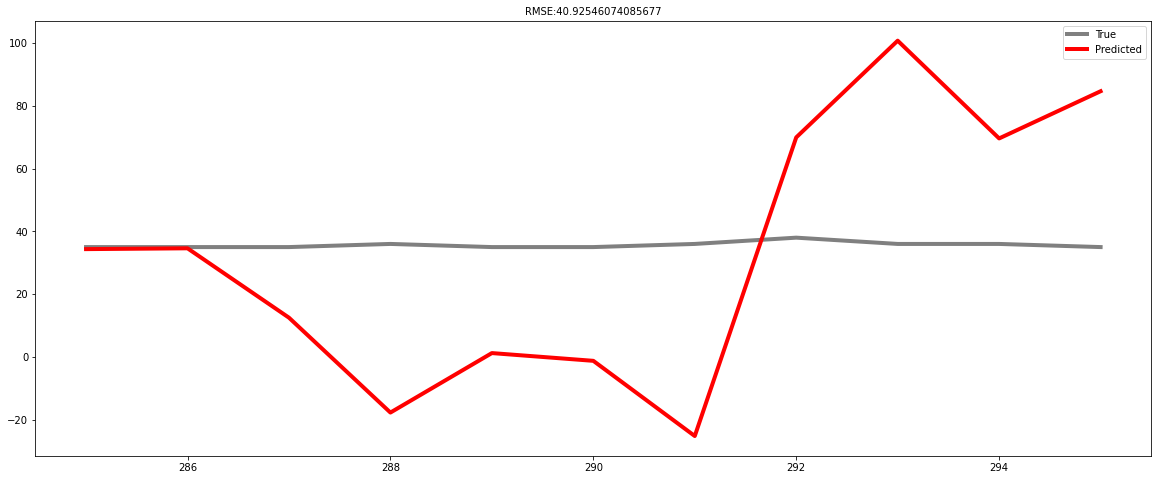

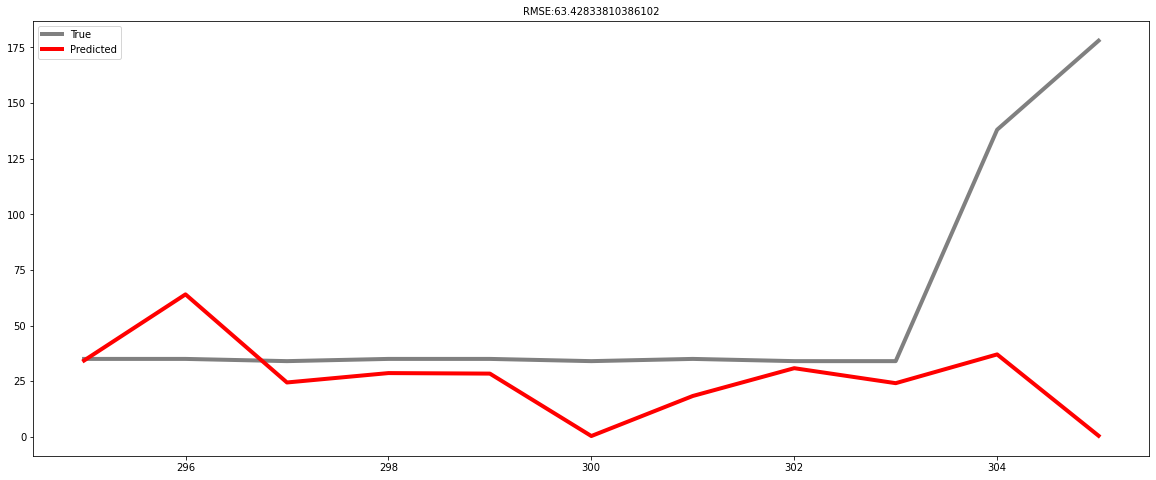

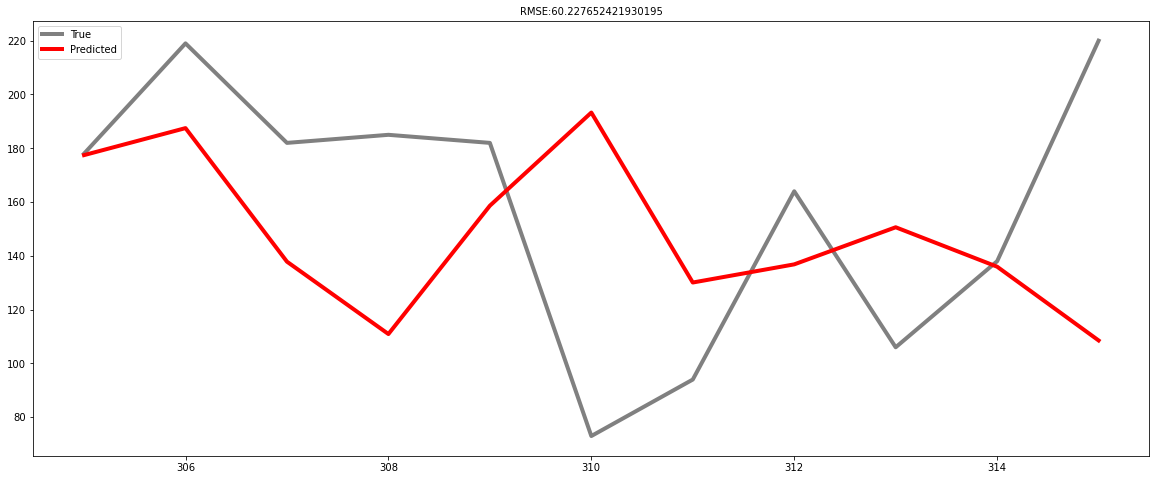

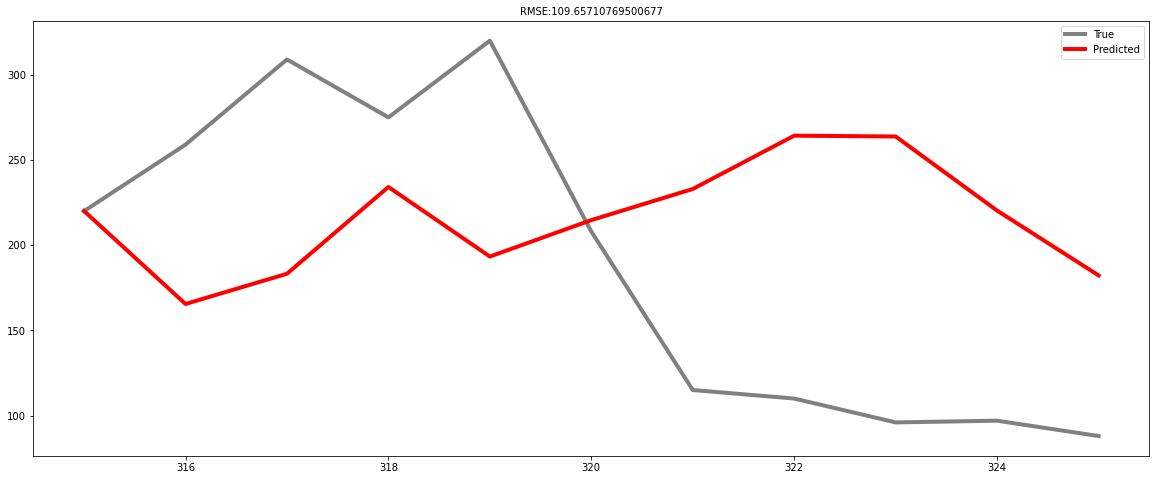

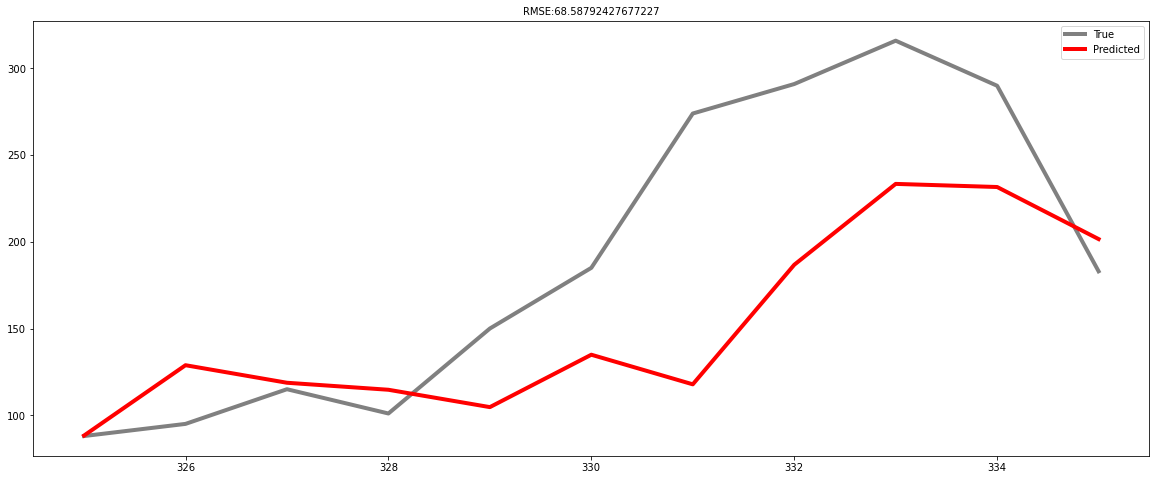

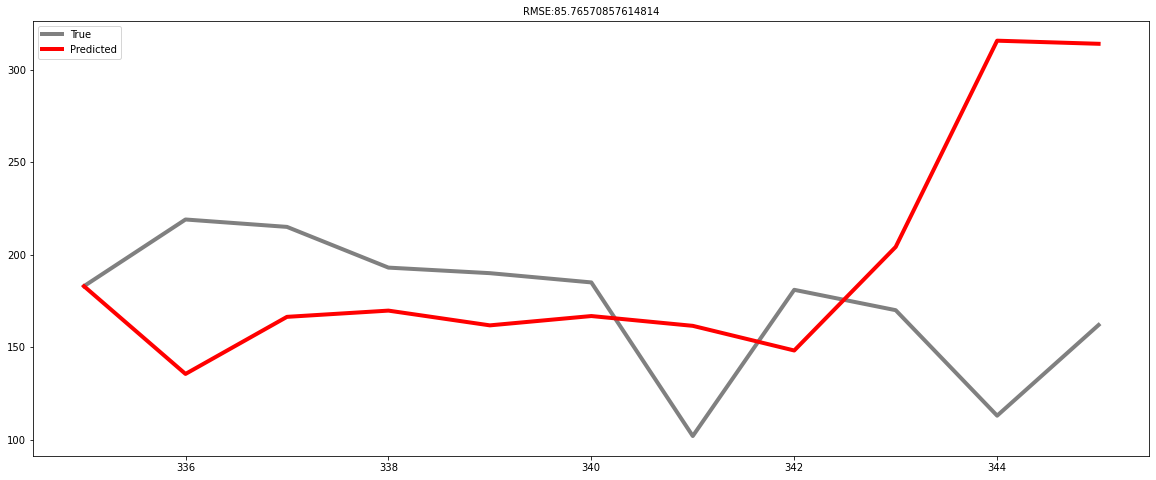

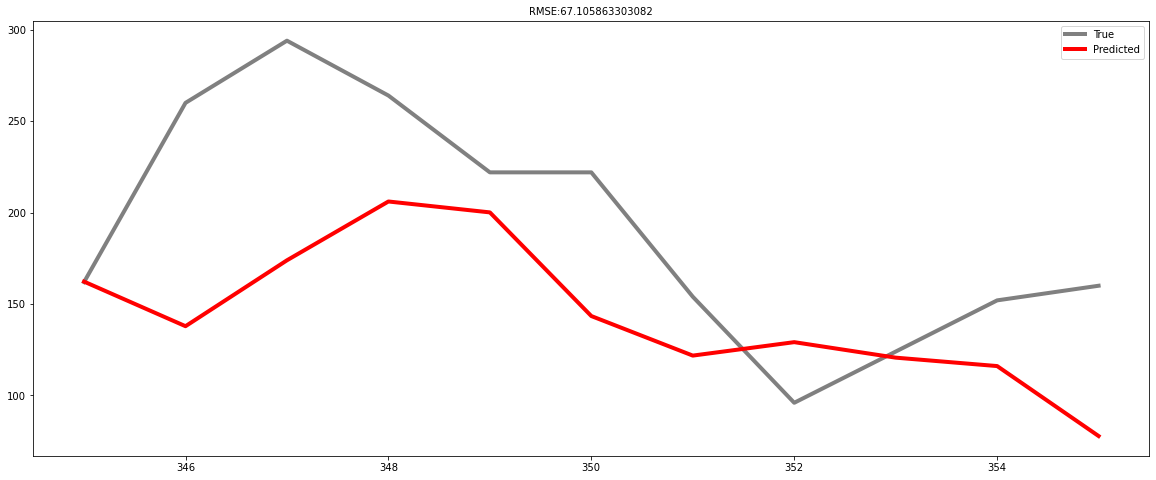

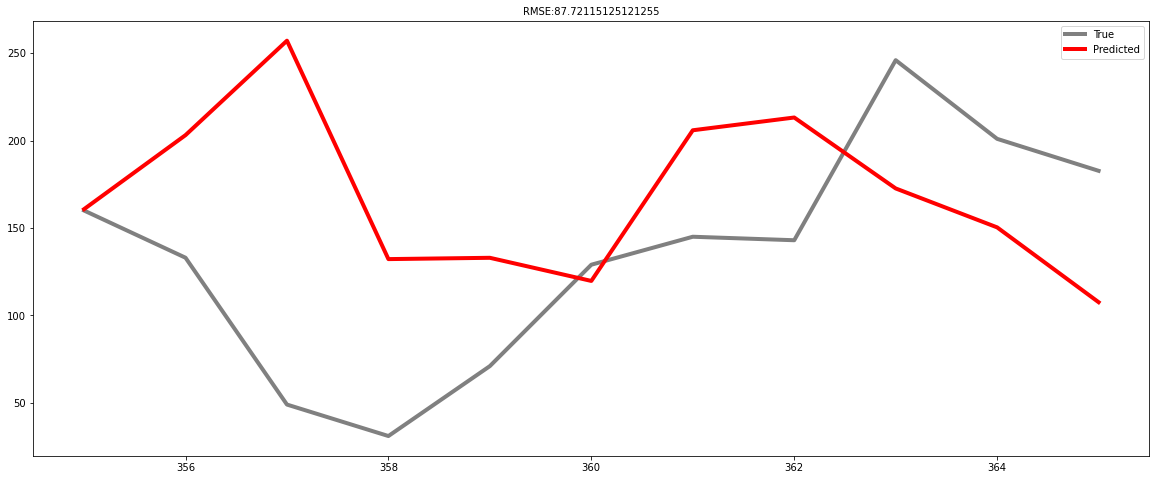

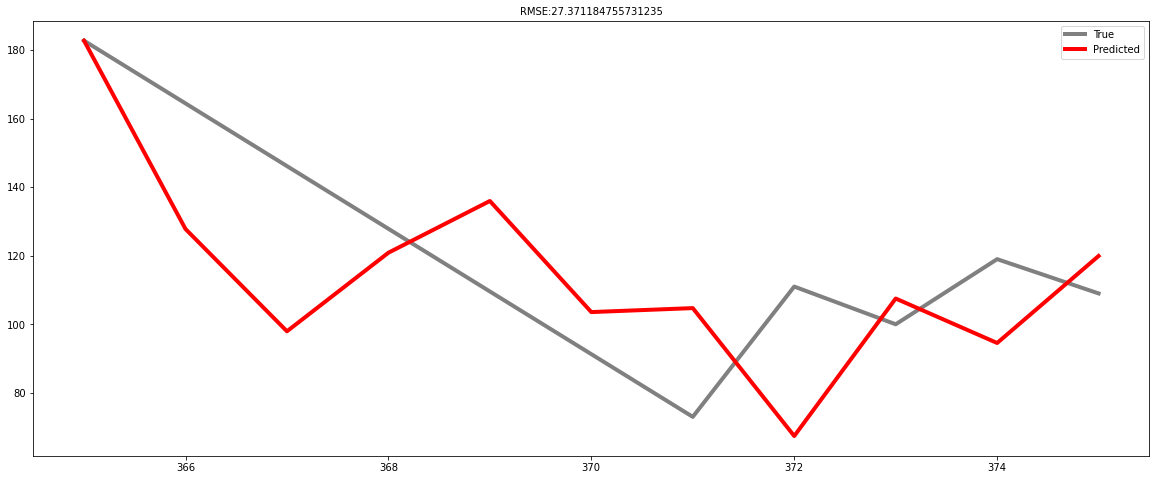

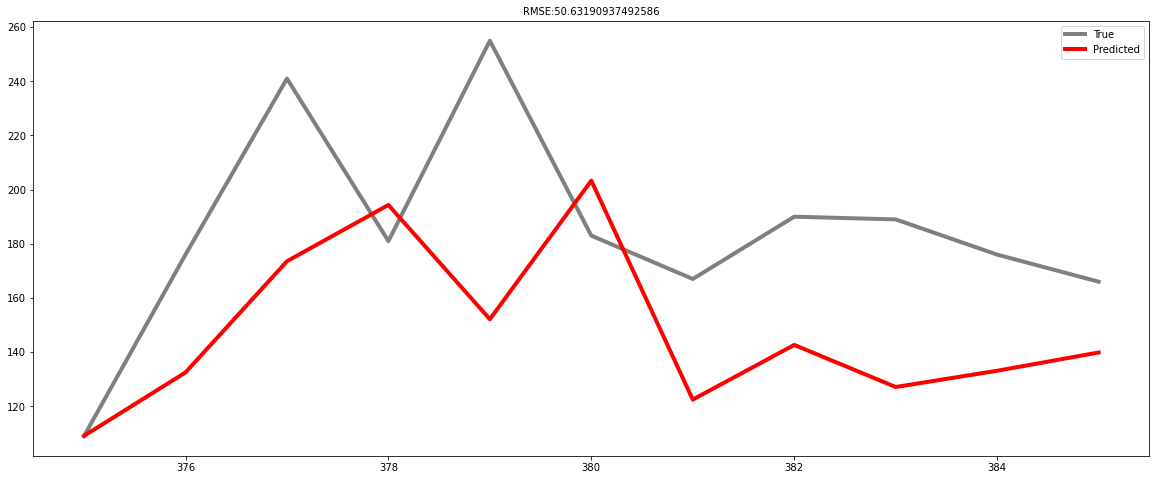

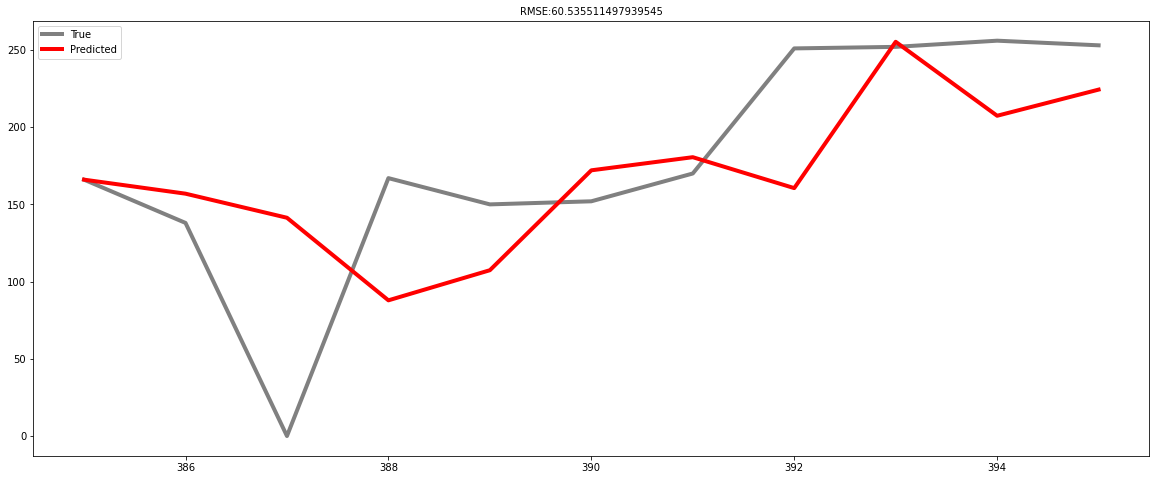

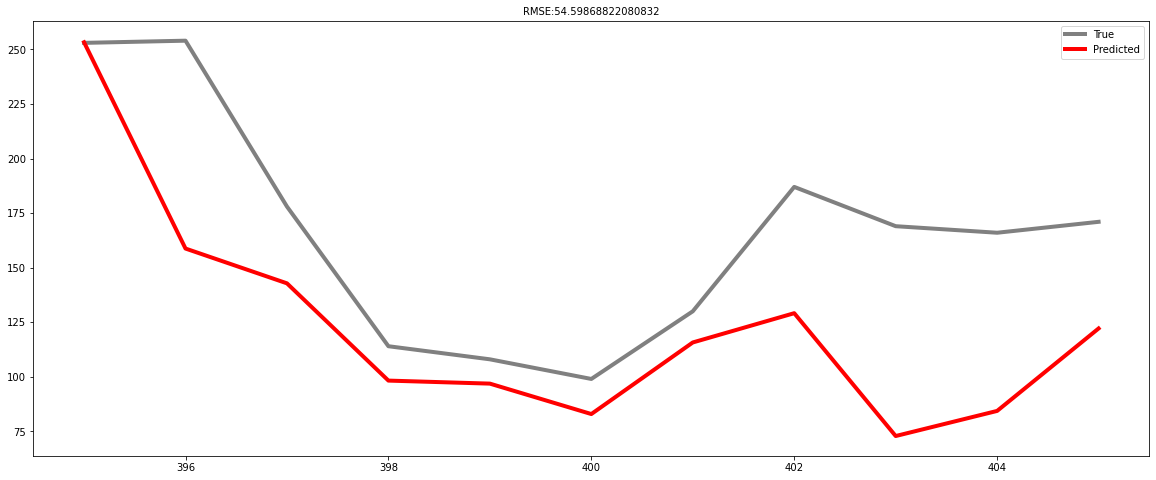

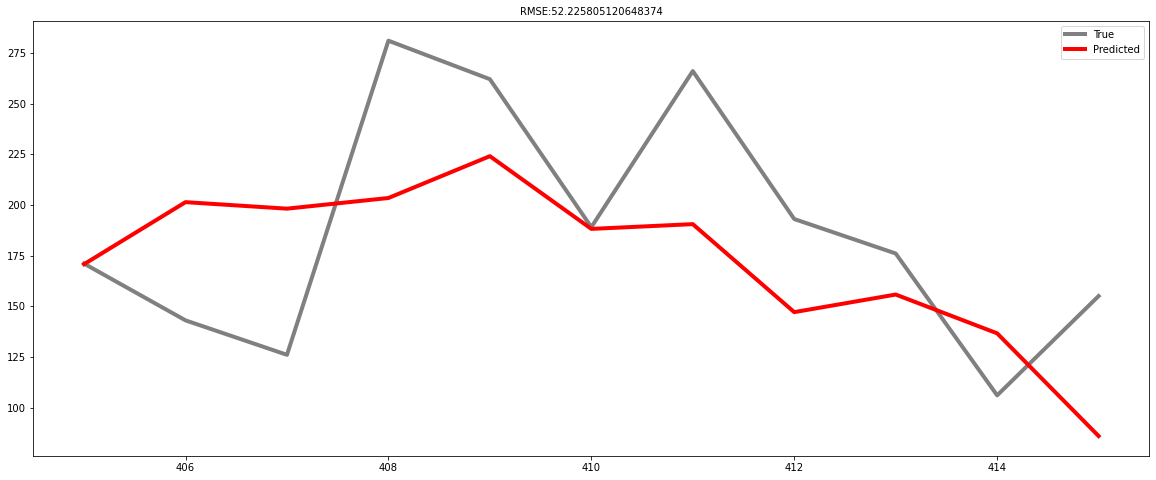

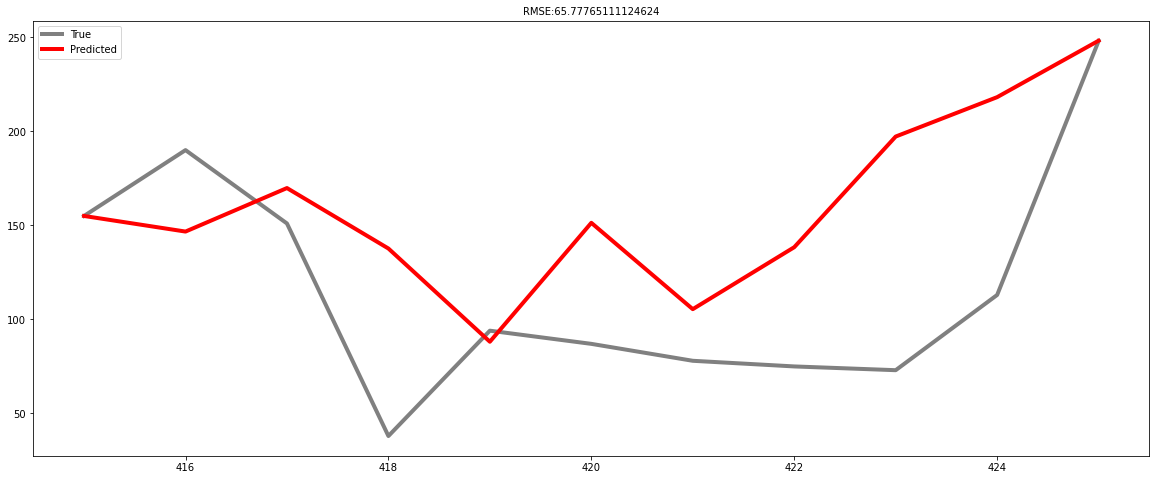

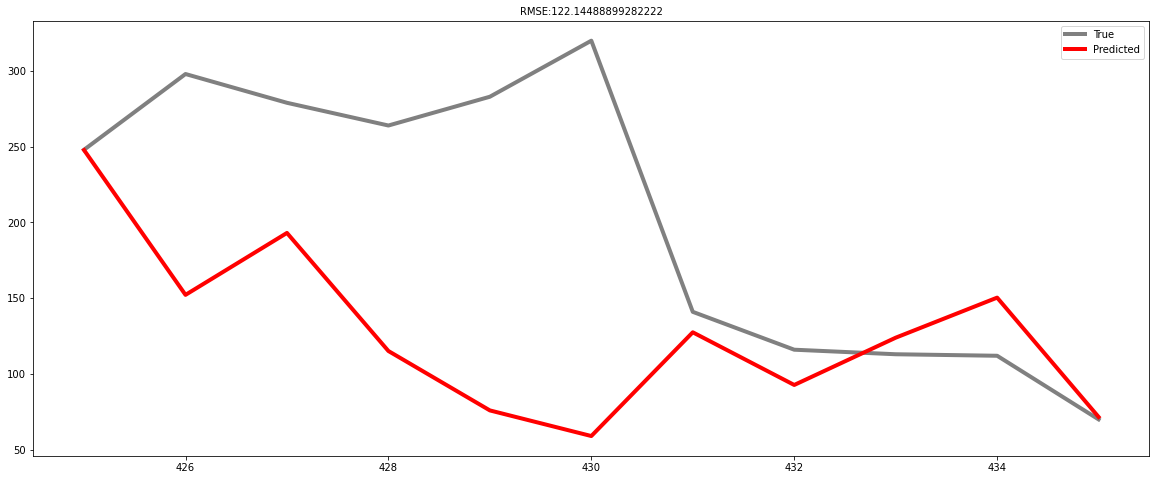

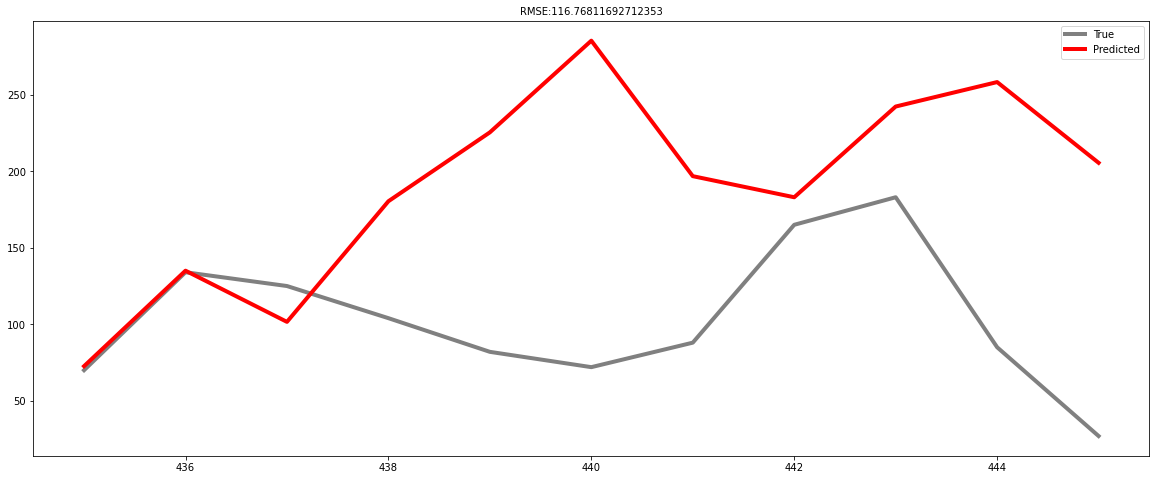

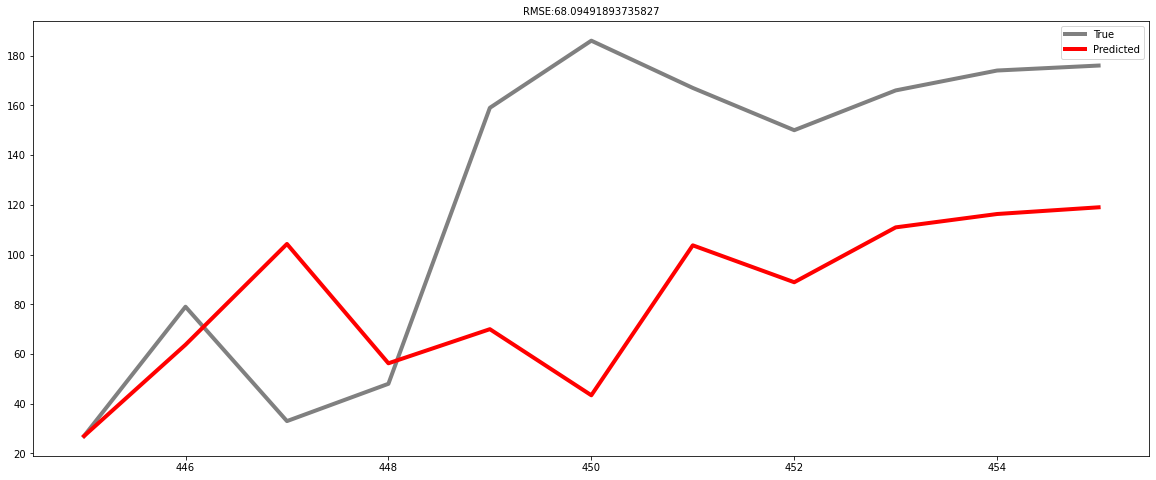

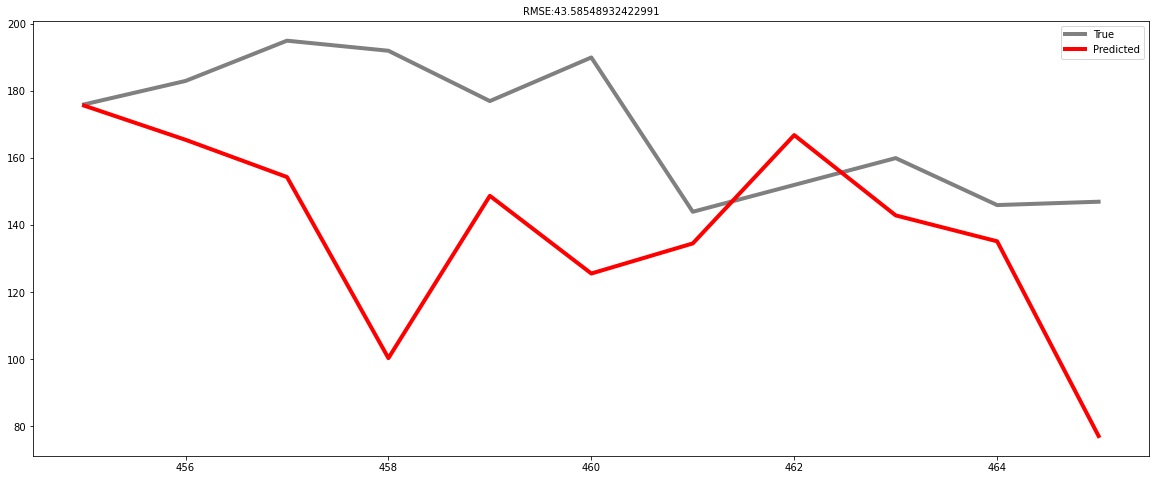

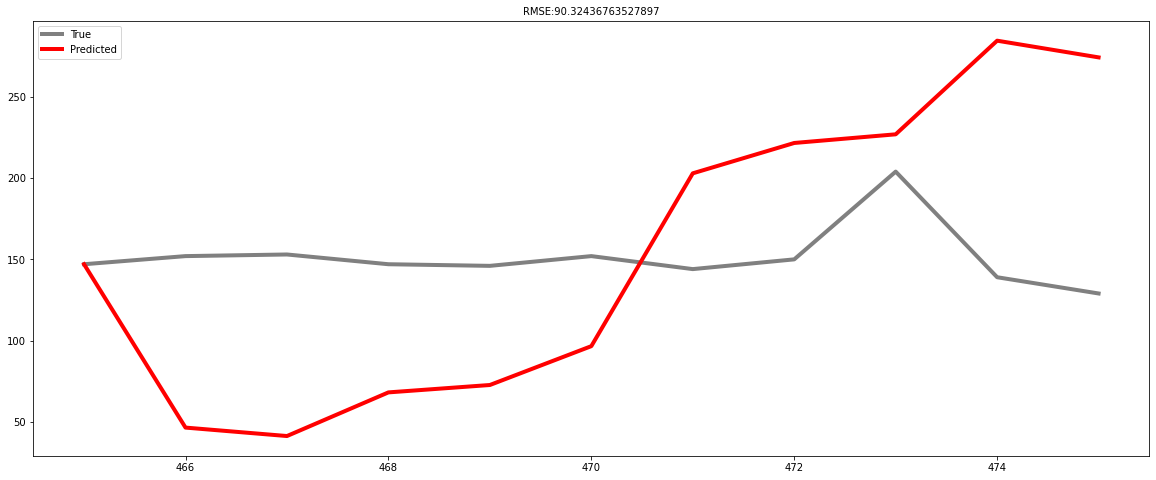

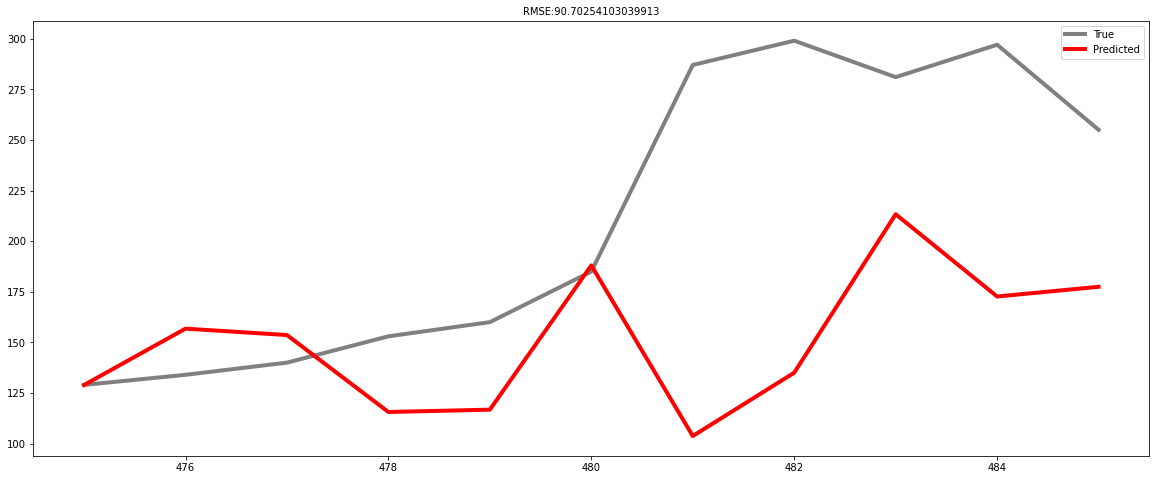

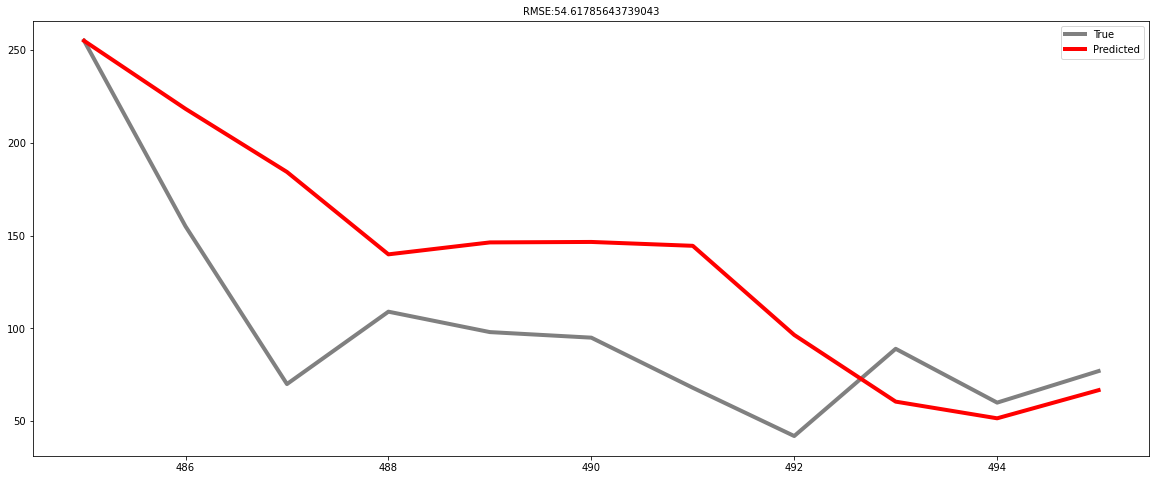

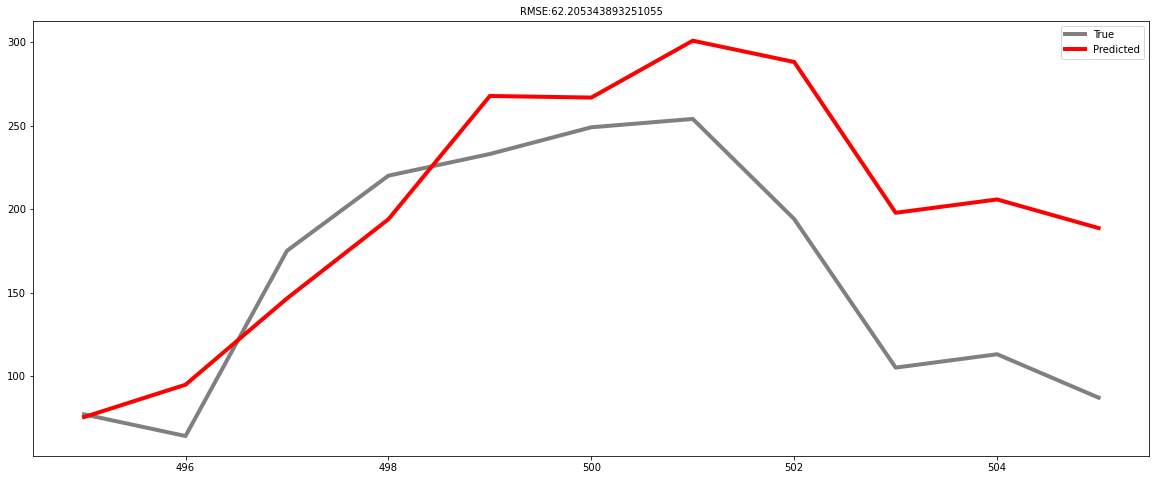

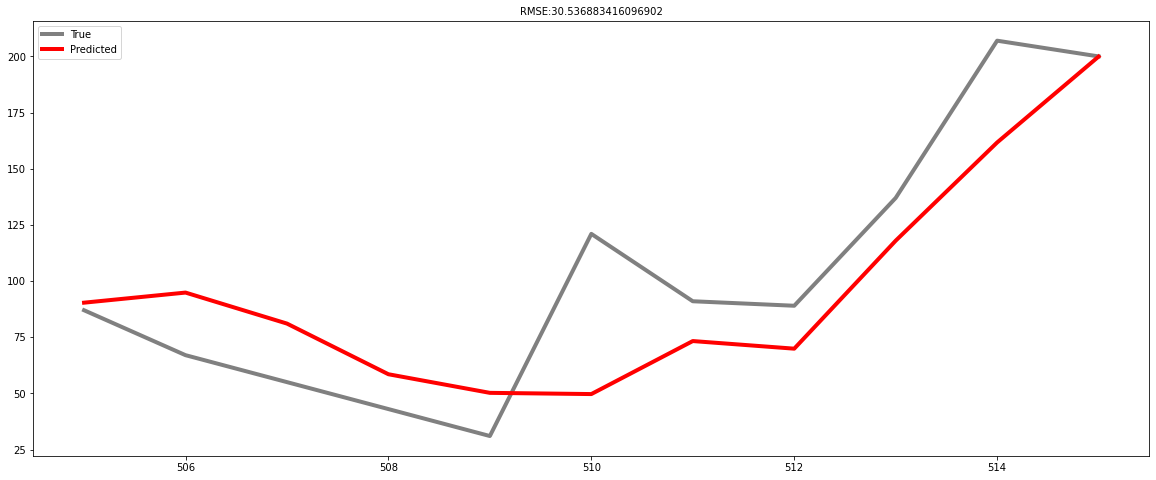

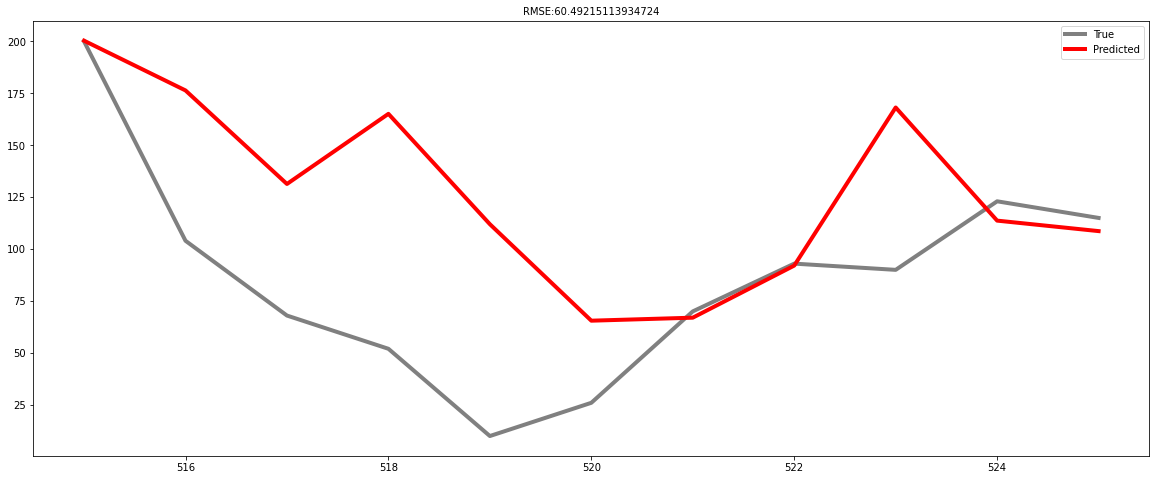

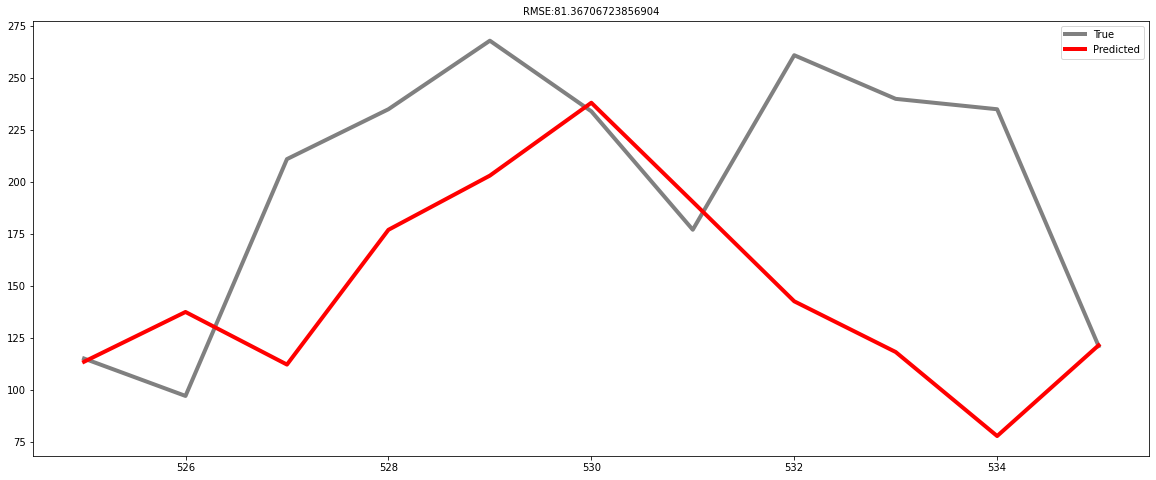

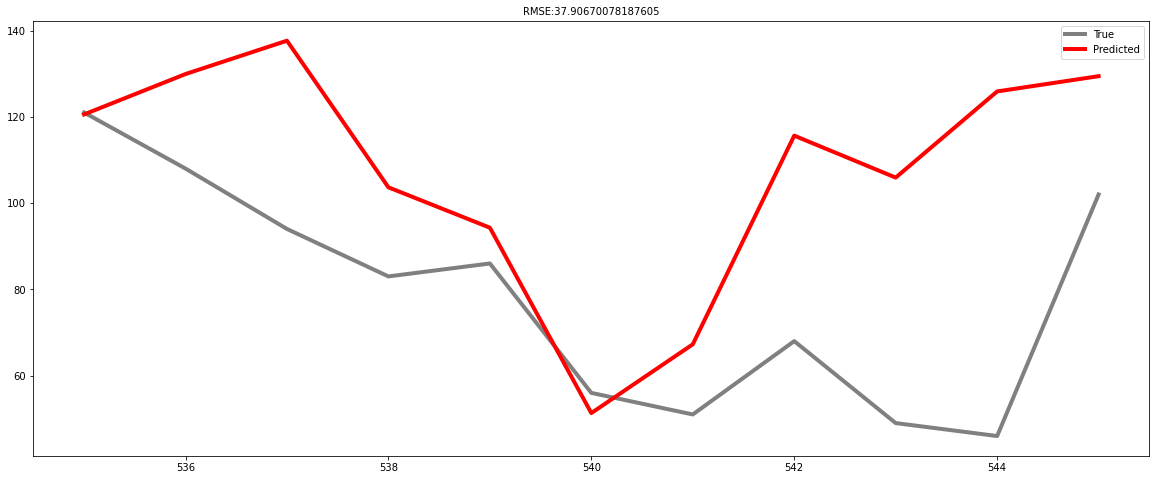

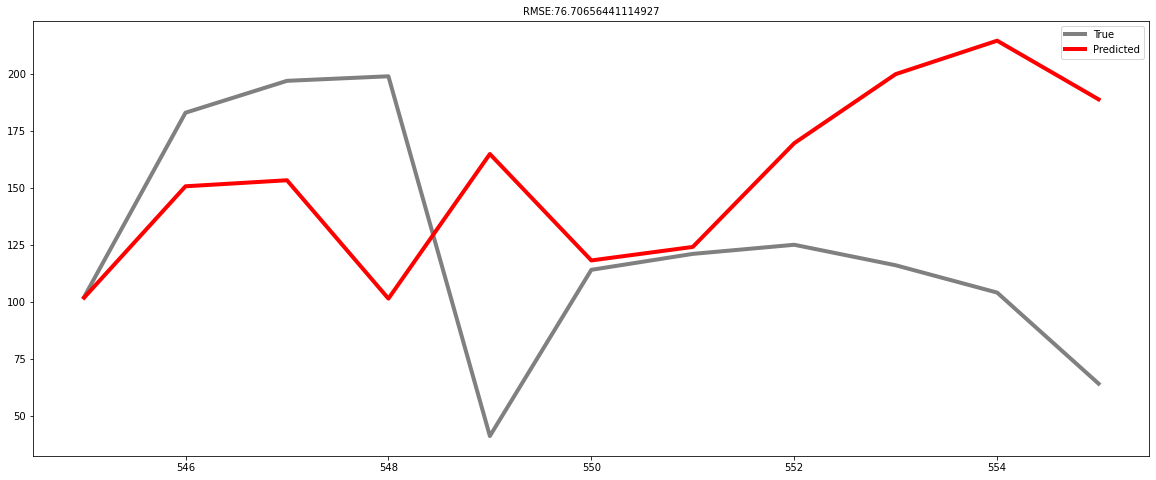

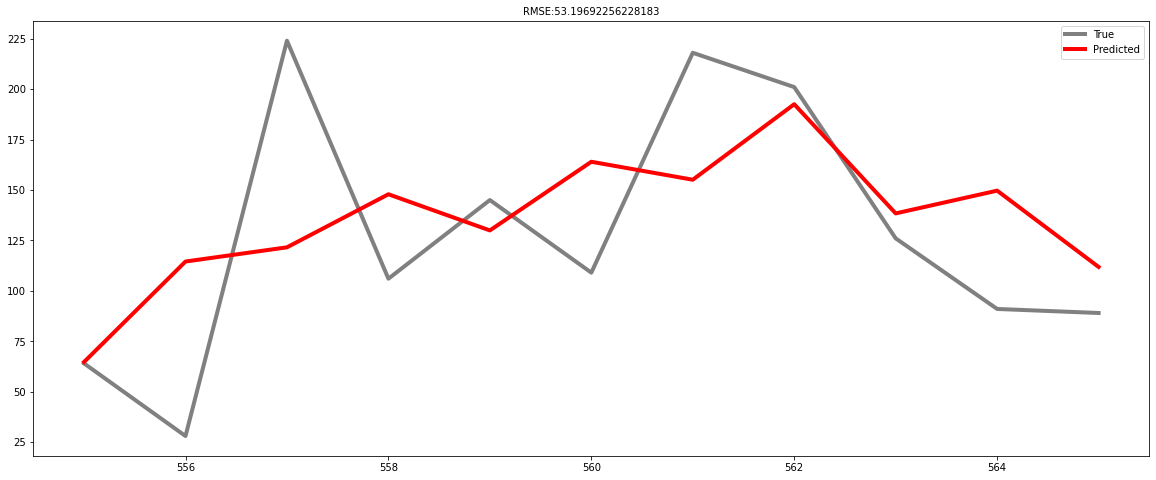

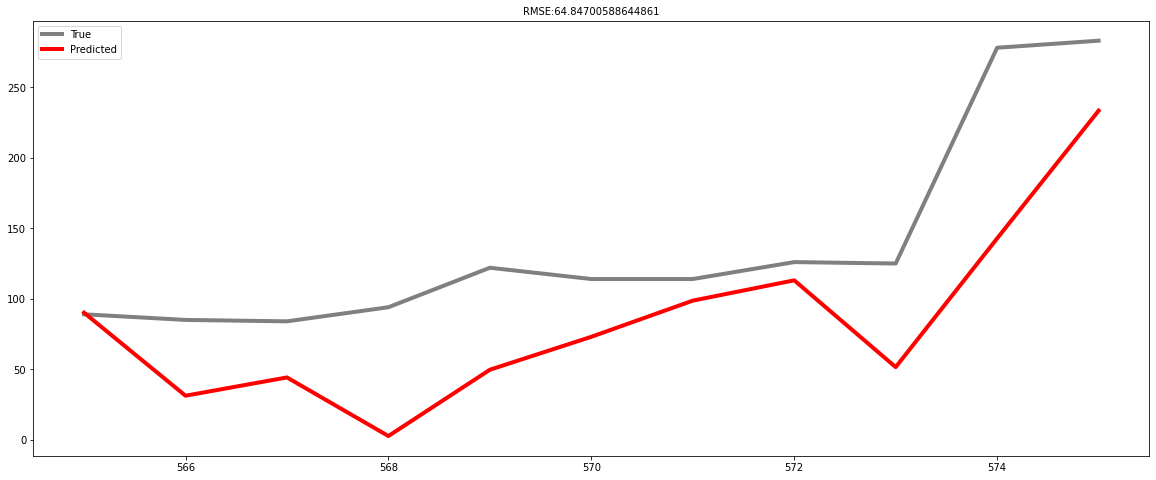

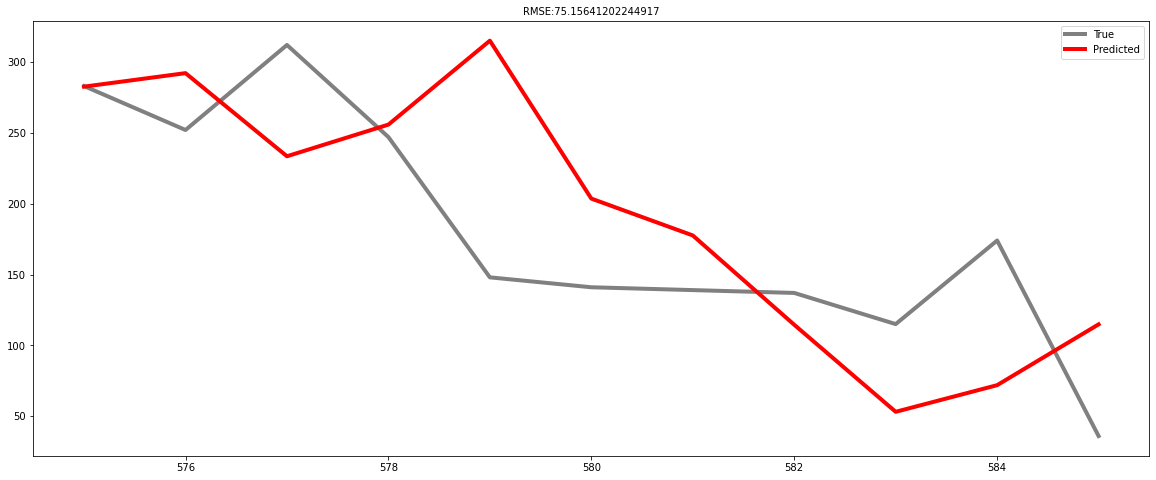

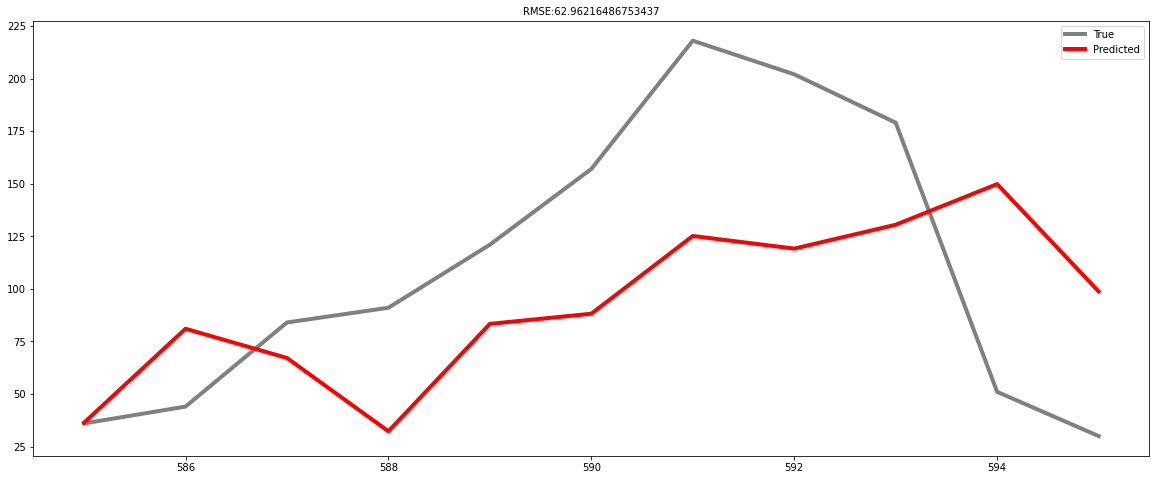

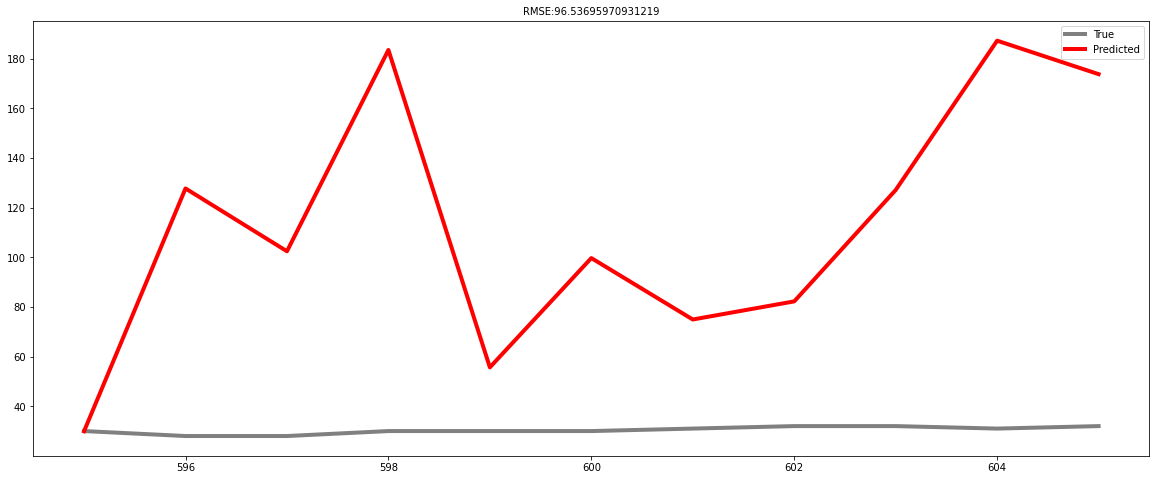

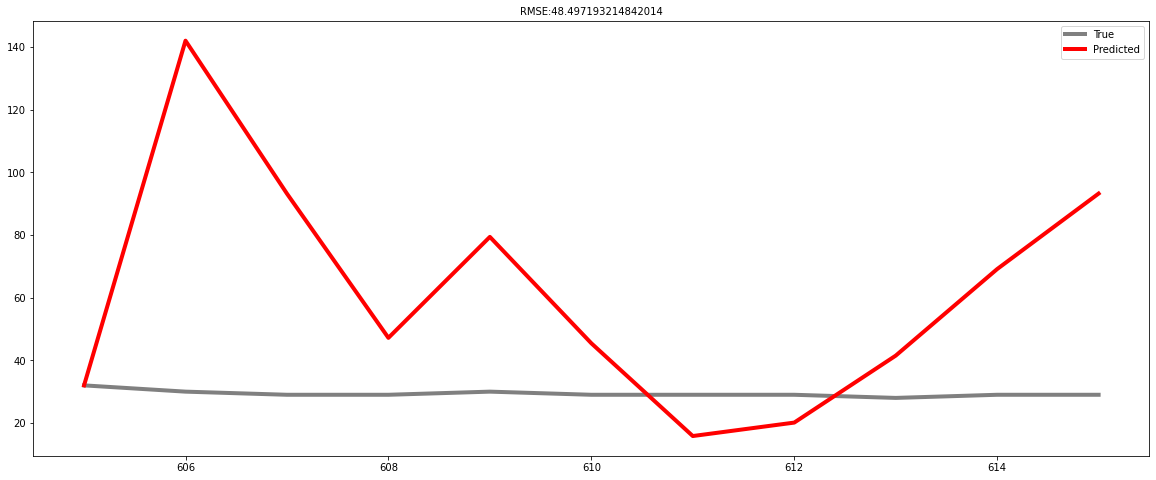

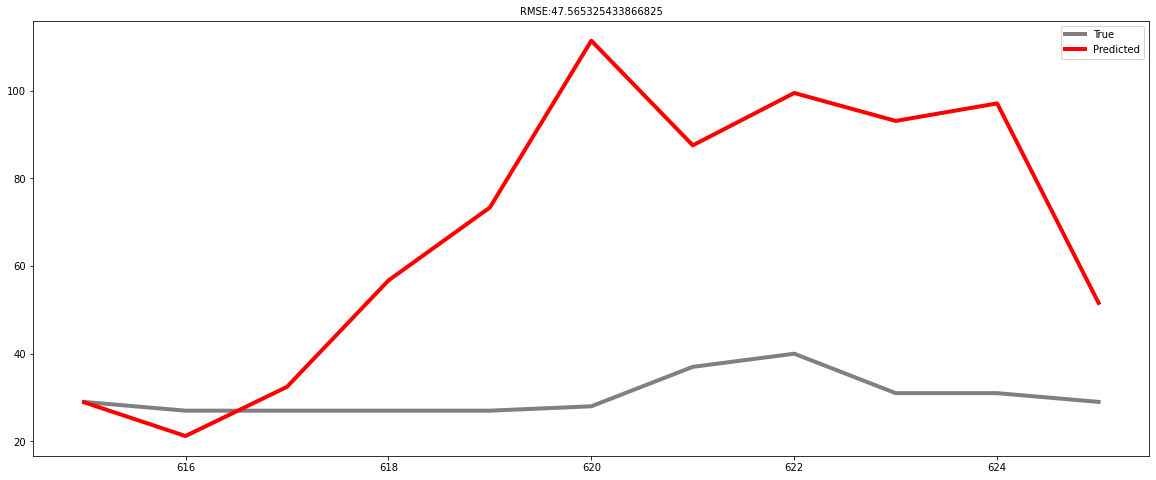

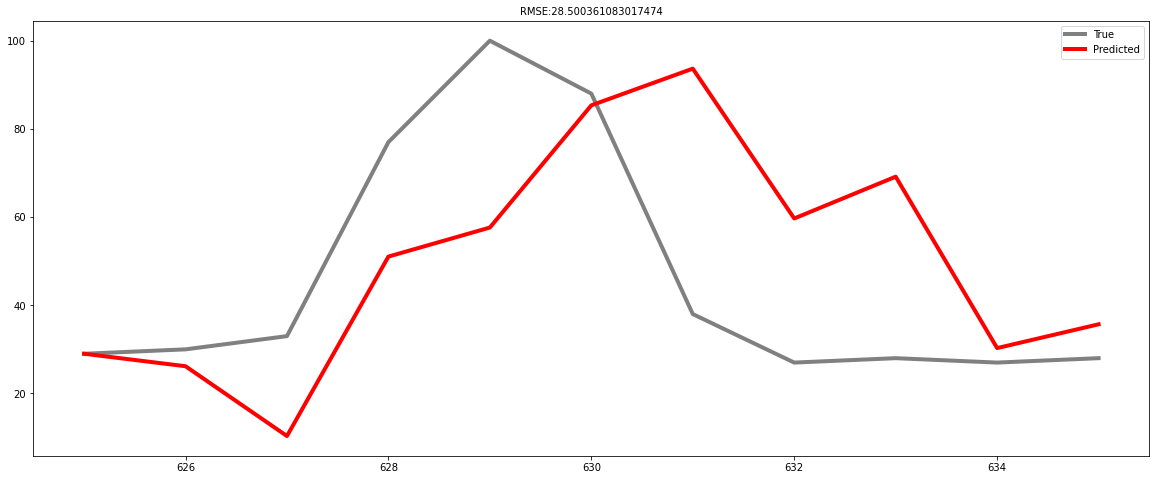

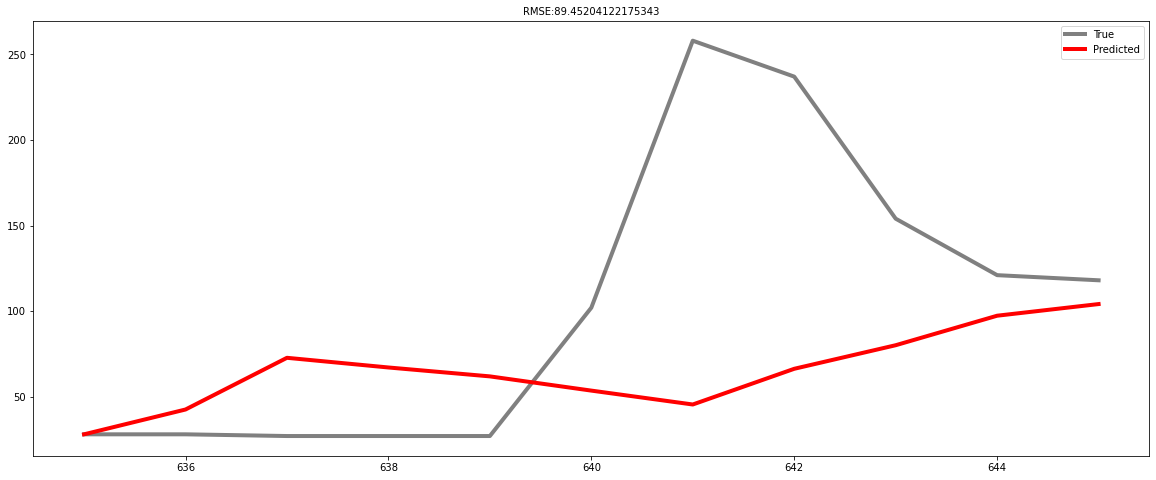

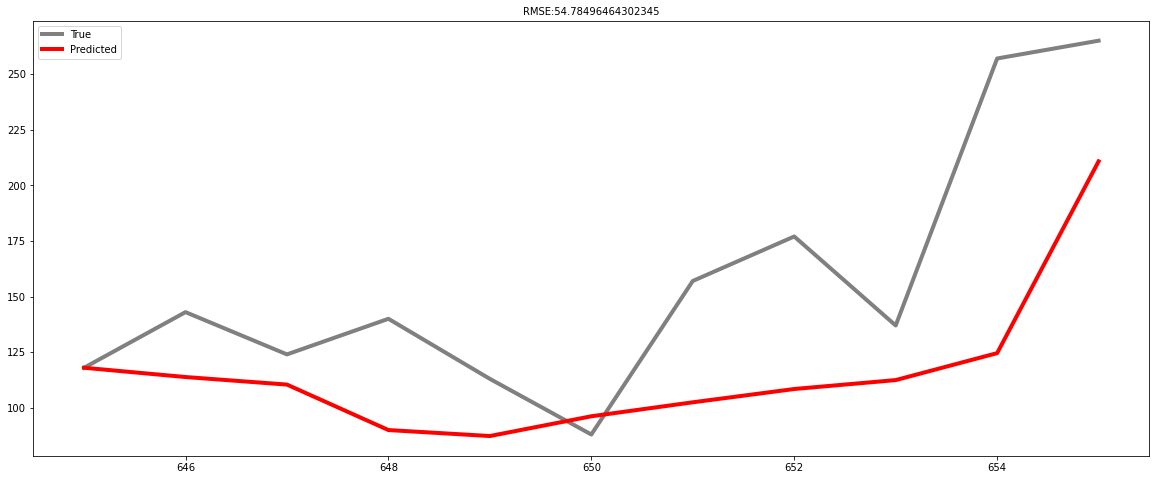

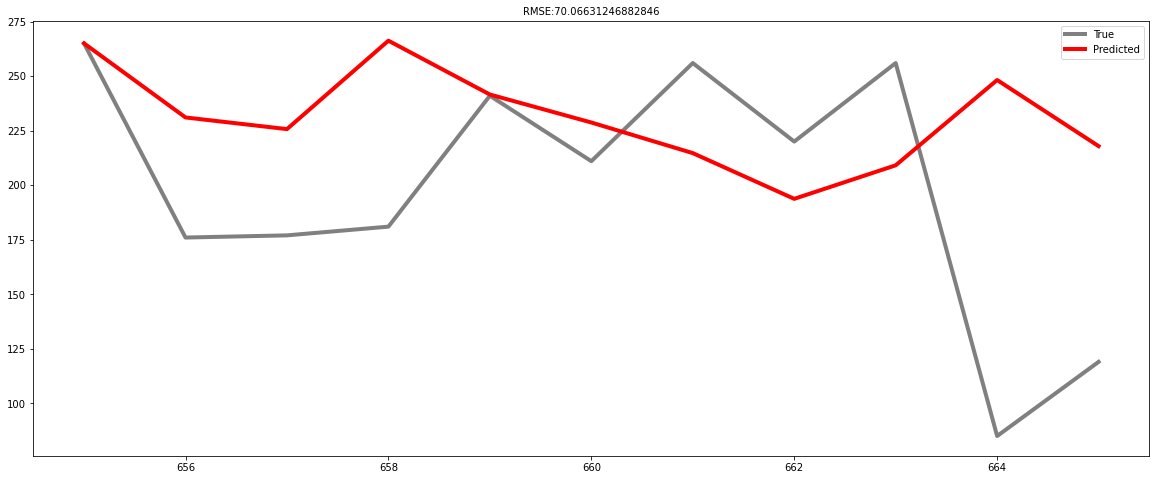

In [10]:
RMSE = []    
m = 0
days = 24*4
for i in range((days+10),len(df),10):
    EM4_new = df.iloc[m:i]
    train = EM4_new[0 : -10]
    test = EM4_new[-11:]
    m = i - days
    
    import warnings
    warnings.filterwarnings('ignore')
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=n_steps))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit((train.drop('out', axis = 1)).values, train['out'], epochs=200, verbose=0)
    
    x_input = array(test.drop('out', axis = 1).values)
    yhat = model.predict(x_input, verbose=0)
    pred = pd.DataFrame(yhat, index = test.index)
    pred = pred.rename(columns= {0:'Pred'})
    pred['True'] = test['out'].values
    
    rmse = sqrt(mean_squared_error(pred['Pred'],pred['True']))
    RMSE.append(rmse)
    plt.figure(figsize=(20,8))
    plt.title('RMSE:{}'.format(rmse))
    plt.rcParams['axes.titlesize'] = 10
    plt.plot(pred['True'], label='True', lw = 4, color = 'grey')
    plt.plot(pred['Pred'], label='Predicted', lw = 4, color = 'red')
    plt.legend(loc='best')
    plt.show()

In [11]:
statistics.mean(RMSE)

68.40998838084705

In [8]:
# m = 0
# days = 24*4
# for i in range((days+10),len(df),10):
#     EM4_new = df.iloc[m:i]
#     train = EM4_new[0 : -10]
#     test = EM4_new[-11:]
#     m = i - days